### TASK 2

- BATA ARNOLD NAA
- DATA SCIENCE
- MOVIE RATINGS PREDICTION

In [238]:
# Importing needed libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [239]:
#Importing dataset 
df = pd.read_csv('AB.csv', encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### DATA CLEANING

In [240]:
#Checking the total number of missing cells in each column
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [241]:
#Checking the data types in the dataset
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [242]:
#Dropping NA values
df = df.dropna()

In [243]:
#Removing unwanted special characters

df['Name'] = df['Name'].str.extract("([A-Za-z\s\'\-]+)")

df['Duration'] = df['Duration'].str.replace('min', '')
df['Duration'] = pd.to_numeric(df['Duration'])

df['Year'] = df['Year'].str.replace('(', '').str.replace(')', '')
df['Year'] = pd.to_numeric(df['Year'])

df['Votes'] = df['Votes'].str.replace(',', '')
df['Votes'] = pd.to_numeric(df['Votes'])

df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [244]:
#Spliting the genre column 
df['Genre'] = df['Genre'].str.split(',')
df = df.explode('Genre')

df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [245]:
#Dropping the duplicate cells
df = df.drop_duplicates(subset='Name', keep = False)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
10,An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
30,Park Avenue,2005,116,Drama,7.1,1002,Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose
32,th August,1993,168,Drama,5.6,15,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor
...,...,...,...,...,...,...,...,...,...,...
15478,Zindagi Tere Naam,2012,120,Romance,4.4,33,Ashu Trikha,Mithun Chakraborty,Ranjeeta Kaur,Priyanka Mehta
15479,Zindagi Tumse,2019,120,Family,6.0,13,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri
15482,Zindagi Zindabad,2000,140,Drama,5.7,7,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji
15488,Zoo,2018,100,Drama,5.7,78,Shlok Sharma,Shashank Arora,Prince Daniel,Shatakshi Gupta


### GRAPHS FROM DATASET

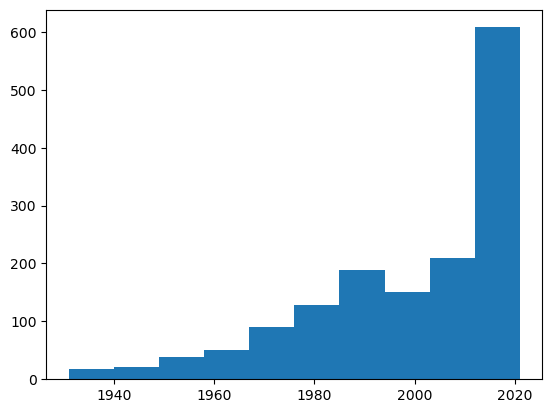

In [246]:
plt.hist(df['Year'])
plt.title('Graph of Year')
plt.show()

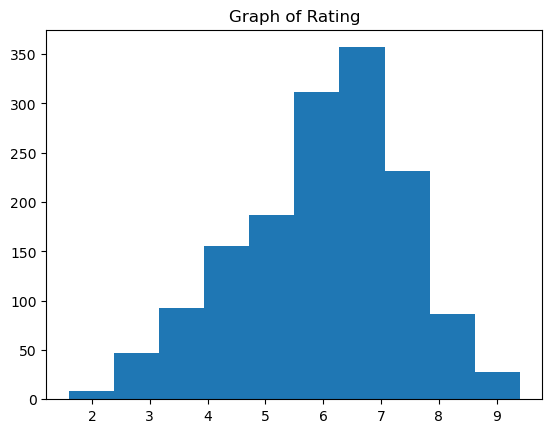

In [247]:
plt.hist(df['Rating'])
plt.title('Graph of Rating')
plt.show()

### GETTING SOME INSIGHTS FROM THE DATA

In [248]:
Movie_Votes = df.groupby('Name')['Votes'].sum()

print('The movie with the most votes is,' ,Movie_Votes.idxmax(), 'by' ,Movie_Votes.max())
print('The movie with the least votes is,' ,Movie_Votes.idxmin(), 'by' ,Movie_Votes.min())

The movie with the most votes is, My Name Is Khan by 101014
The movie with the least votes is, Anmol Sitaare by 5


### BUILDING THE MODEL

In [249]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

imputer = SimpleImputer(strategy='mean')
imputer.fit(df[['Rating', 'Duration', 'Year']])
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
10,An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
30,Park Avenue,2005,116,Drama,7.1,1002,Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose
32,th August,1993,168,Drama,5.6,15,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Creating separate instances of LabelEncoder for each column
label_genre = LabelEncoder()
label_actor1 = LabelEncoder()
label_actor2 = LabelEncoder()
label_director = LabelEncoder()
label_actor3 = LabelEncoder()

# Applying LabelEncoder to each column
df['Genre'] = label_genre.fit_transform(df['Genre'])
df['Actor 1'] = label_actor1.fit_transform(df['Actor 1'])
df['Actor 2'] = label_actor2.fit_transform(df['Actor 2'])
df['Director'] = label_director.fit_transform(df['Director'])
df['Actor 3'] = label_actor3.fit_transform(df['Actor 3'])

In [251]:
df.dtypes

Name         object
Year          int64
Duration      int64
Genre         int32
Rating      float64
Votes         int64
Director      int32
Actor 1       int32
Actor 2       int32
Actor 3       int32
dtype: object

In [252]:
X = df[['Year','Duration','Votes','Genre','Actor 1','Actor 2','Actor 3','Director']]
y = df['Rating']

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = True)

In [254]:
from sklearn.linear_model import LinearRegression
LogReg = LinearRegression()
LogReg.fit(X_train, y_train)


LinearRegression()

In [255]:
pred = LogReg.predict(X_test)


In [256]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print('The mean squared error of the fitted model:',mean_squared_error(y_test,pred))
print('The mean absolute error of the fitted model:',mean_absolute_error(y_test,pred))
print('The R score of the fitted model:',r2_score(y_test,pred))

The mean squared error of the fitted model: 1.9235146274144392
The mean absolute error of the fitted model: 1.0824071539793192
The R score of the fitted model: 0.03370681107819595
